# Importing data for supervised learning

In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show all columns in output
pd.options.display.max_columns = None

# Show all values in columns
pd.options.display.max_colwidth = None

# read the file
gapminder = pd.read_csv('./Datasets/gm_2008_region.csv')

# inspect the dataframe
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [2]:
# Create array X for the 'fertility' feature and array y for the 'life' target variable.
x = gapminder['fertility'].values
y = gapminder['life'].values

# check the shape of arrays
print(x.shape)
y.shape

(139,)


(139,)

In [3]:
# Reshape the arrays by using the .reshape() method and passing in -1 and 1
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# check new shape
print(x.shape)
y.shape

(139, 1)


(139, 1)

# Exploring the Gapminder data


In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


All the columns are float object except for the `Region` column

In [5]:
# show descriptive statistics
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [6]:
# show correlations matrices
gapminder.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


<AxesSubplot:>

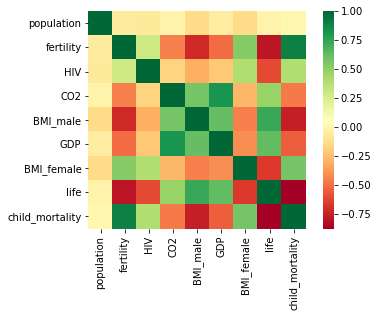

In [7]:
# display correlations plot
import seaborn as sns
sns.heatmap(gapminder.corr(), square = True, cmap = 'RdYlGn')

One intuition from the correlations plot is that `child_mortality` and `fertiity` have strong negative correlations with `life` expectancy. while `BMI_male` and `GDP` have strong positive correlations with `life`

# Fit & predict for regression


In [8]:
# import the linear regression module
from sklearn.linear_model import LinearRegression

# Create a LinearRegression regressor called reg.
reg = LinearRegression()

# Set up the prediction space to range from the minimum to the maximum of X_fertility.
prediction_space = np.linspace(min(x), max(x)).reshape(-1, 1)
prediction_space.shape

(50, 1)

In [9]:
# Fit the regressor to the data (X_fertility and y)
reg.fit(x, y)

# compute the predictions using the .predict() method and the prediction_space array.
y_pred = reg.predict(prediction_space)

# Compute and print the  score using the .score() method.
reg.score(x, y)

0.6192442167740035

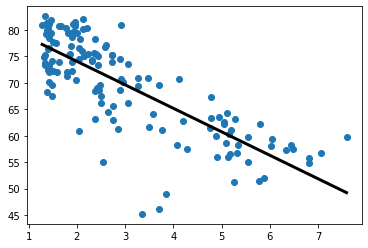

In [10]:
# Plot regression line
plt.scatter(x, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

# Train/test split for regression


In [11]:
# get all numeric features
x_2 = gapminder.drop(['Region', 'life'], axis = 1).values

# get dependent variable
y_2 = gapminder['life'].values

# check
print(y_2.shape)
x_2.shape

(139,)


(139, 8)

In [12]:
# import relevant modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Using X and y, create training and test sets such that 30% is used for testing
# and 70% for training. Use a random state of 42.
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size = 0.3, random_state = 42)

# Create a linear regression regressor called reg_all,
reg_all = LinearRegression()

# fit it to the training set, and evaluate it on the test set.
reg_all.fit(x_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(x_test)

# Compute and print R squared score
print(f"R squared score: {reg_all.score(x_test, y_test)}")

# Compute and print the RMSE. To do this, first compute the Mean Squared Error
# using the mean_squared_error() function with the arguments y_test and y_pred,
# and then take its square root using np.sqrt().
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error is {rmse}')

R squared score: 0.8380468731430059
Root Mean Squared Error is 3.247601080037022


# 5-fold cross-validation

In [13]:
# import cross_val_score from sklearn.model_selection.
from sklearn.model_selection import cross_val_score

# Use the cross_val_score() function to perform 5-fold cross-validation on x_2 and y_2
cv_scores = cross_val_score(reg_all, x_2, y_2, cv= 5)

# Print the 5-fold cross-validation scores
print(cv_scores, '\n')

print(f"Average 5-Fold CV Score: {np.mean(cv_scores)}")


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637] 

Average 5-Fold CV Score: 0.8599627722793267


# K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. Now we'll perform 3-fold cross-validation and then 10-fold cross-validation on the dataset.

You can use `%timeit` to see how long each 3-fold CV takes compared to 10-fold CV by executing `cv=3` and `cv=10`:



In [14]:
# perform 3-fold cross-validation on x_2 and y_2
cvscores_3 = cross_val_score(reg_all, x_2, y_2, cv=3)
print(np.mean(cvscores_3), '\n')

# Perform 10-fold CV on x_2 and y_2
cvscores_10 = cross_val_score(reg_all, x_2, y_2, cv=10)
print(np.mean(cvscores_10))

0.8718712782621969 

0.8436128620131095


# Regularized regression

### Regularization I: Lasso

In [15]:
# Import Lasso from sklearn.linear_model.
from sklearn.linear_model import Lasso

# Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data and compute the coefficients using the coef_ attribute.
lasso_coef = lasso.fit(x_2, y_2).coef_

print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


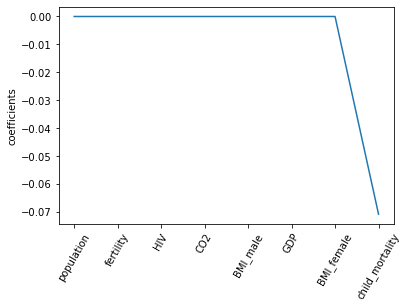

In [16]:
# get the names of feature columns 
names = gapminder.drop(['Region', 'life'], axis = 1).columns

# Plot the coefficients
plt.plot(range(len(names)), lasso_coef)

# set the x-axis names
plt.xticks(range(len(names)), names, rotation= 60)

# set the y-axis label
plt.ylabel('coefficients')

# show the plot
plt.show()

it seems like `child_mortality` is the most important feature when predicting life expectancy.

# Regularization II: Ridge


Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm.

In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha.

Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand the importance of selecting the right value for alpha.

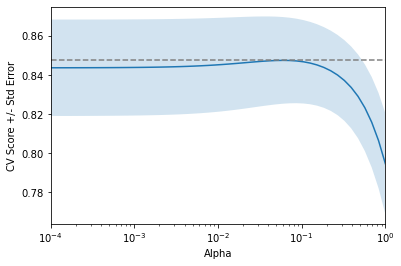

In [17]:
# get a pre-written function
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Import ridge regressor
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, x_2, y_2, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model?